# Lab 2 Sorting

## Import libraries

In [1]:
import math
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

## Generatate random array

In [2]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
values = randint(0, 10000, 1000000)
print(values)

[ 235 5192  905 ... 1309  553 3015]


In [5]:
array_ = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1000000]

## 1. Quick Sort

In [3]:
# Python program for implementation of Quicksort Sort

# This implementation utilizes pivot as the last element in the nums list
# It has a pointer to keep track of the elements smaller than the pivot
# At the very end of partition() function, the pointer is swapped with the pivot to come up with a "sorted" nums relative to the pivot


# Function to find the partition position
def partition(array, low, high):

    # choose the rightmost element as pivot
    pivot = array[high]

    # pointer for greater element
    i = low - 1

    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:

            # If element smaller than pivot is found swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1

# function to perform quicksort
def quickSort(array, low, high):
    if low < high:

        # Find pivot element such that
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        quickSort(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSort(array, pi + 1, high)


In [4]:
ex_time_quick = []

In [6]:
for i in array_:
	start = time.time()
	array_quick = values[:i].copy()
	quickSort(array_quick, 0, i-1)
	end = time.time()
	ex_time_quick.append((end - start) * 1000)


In [7]:
table = pd.DataFrame(data=array_, columns=['array length'])
table['execution time (milliseconds)'] = ex_time_quick
print(table)

   array length  execution time (milliseconds)
0         10000                      75.561762
1         20000                     136.573315
2         40000                     423.094511
3         80000                     701.226711
4        160000                    1439.112663
5        320000                    4283.423424
6        640000                   15965.328217
7       1000000                   32428.710699


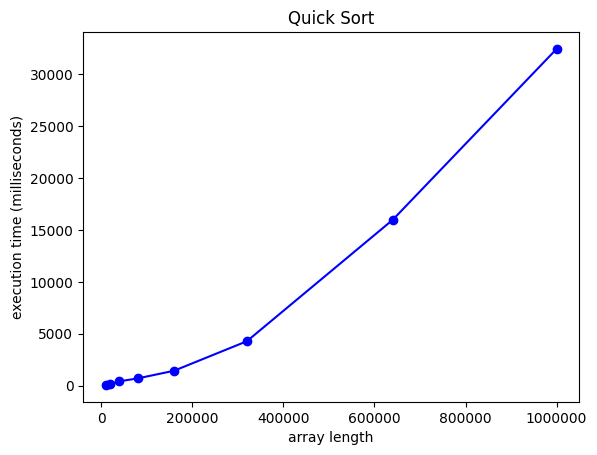

In [8]:
plt.plot(array_, ex_time_quick, '-ob')
plt.xlabel("array length")
plt.ylabel("execution time (milliseconds)")
plt.title("Quick Sort")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## 2. Merge sort

In [9]:
# Python program for implementation of MergeSort

# Merges two sub-arrays of arr[].
# First subarray is arr[l..m]
# Second subarray is arr[m+1..r]

def merge(arr, l, m, r):
	n1 = m - l + 1
	n2 = r - m
	# create temp arrays
	L = [0] * (n1)
	R = [0] * (n2)

	# Copy data to temp arrays L[] and R[]
	for i in range(0, n1):
		L[i] = arr[l + i]
	for j in range(0, n2):
		R[j] = arr[m + 1 + j]

	# Merge the temp arrays back into arr[l..r]
	i = 0	 # Initial index of first subarray
	j = 0	 # Initial index of second subarray
	k = l	 # Initial index of merged subarray

	while i < n1 and j < n2:
		if L[i] <= R[j]:
			arr[k] = L[i]
			i += 1
		else:
			arr[k] = R[j]
			j += 1
		k += 1

	# Copy the remaining elements of L[], if there are any
	while i < n1:
		arr[k] = L[i]
		i += 1
		k += 1

	# Copy the remaining elements of R[], if there are any
	while j < n2:
		arr[k] = R[j]
		j += 1
		k += 1

def mergeSort(arr, l, r):
	if l < r:

		# Same as (l+r)//2, but avoids overflow for large l and h
		m = l+(r-l)//2

		# Sort first and second halves
		mergeSort(arr, l, m)
		mergeSort(arr, m+1, r)
		merge(arr, l, m, r)


In [10]:
ex_time_merge = []
for i in array_:
	start = time.time()
	array_merge = values[:i].copy()
	mergeSort(array_merge, 0, i - 1)
	end = time.time()
	ex_time_merge.append((end - start) * 1000)

table = pd.DataFrame(data=array_, columns=['array length'])
table['execution time (milliseconds)'] = ex_time_merge
print(table)

   array length  execution time (milliseconds)
0         10000                     141.733885
1         20000                     161.025763
2         40000                     339.965820
3         80000                     632.672310
4        160000                    1456.979036
5        320000                    2508.240700
6        640000                    5733.288527
7       1000000                    9382.791996


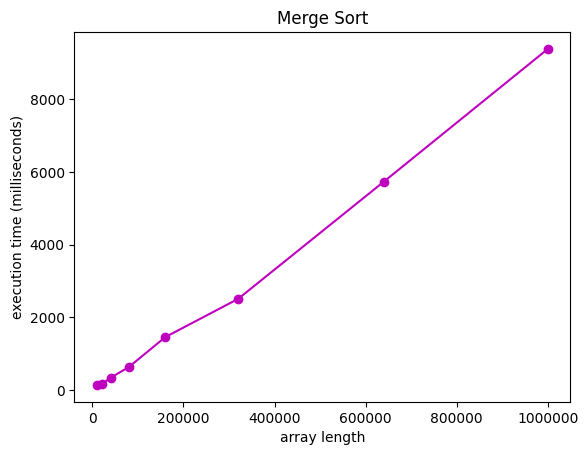

In [11]:
plt.plot(array_, ex_time_merge, '-om')
plt.xlabel("array length")
plt.ylabel("execution time (milliseconds)")
plt.title("Merge Sort")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## 3. Heap Sort

In [12]:
# Python program for implementation of heap Sort

# To heapify subtree rooted at index i.
# n is size of heap

def heapify(arr, n, i):
	largest = i # Initialize largest as root
	l = 2 * i + 1 # left = 2*i + 1
	r = 2 * i + 2 # right = 2*i + 2

# See if left child of root exists and is
# greater than root
	if l < n and arr[i] < arr[l]:
		largest = l

# See if right child of root exists and is
# greater than root
	if r < n and arr[largest] < arr[r]:
		largest = r

# Change root, if needed
	if largest != i:
		(arr[i], arr[largest]) = (arr[largest], arr[i]) # swap

# Heapify the root.
		heapify(arr, n, largest)


# The main function to sort an array of given size
def heapSort(arr):
	n = len(arr)

# Build a maxheap.
# Since last parent will be at ((n//2)-1) we can start at that location.
	for i in range(n // 2 - 1, -1, -1):
		heapify(arr, n, i)

# One by one extract elements
	for i in range(n - 1, 0, -1):
		(arr[i], arr[0]) = (arr[0], arr[i]) # swap
		heapify(arr, i, 0)


In [13]:
ex_time_heap = []
for i in array_:
	start = time.time()
	array_heap = values[:i].copy()
	heapSort(array_heap)
	end = time.time()
	ex_time_heap.append((end - start) * 1000)

table = pd.DataFrame(data=array_, columns=['array length'])
table['execution time (milliseconds)'] = ex_time_heap
print(table)

   array length  execution time (milliseconds)
0         10000                     206.194878
1         20000                     317.981243
2         40000                     584.065199
3         80000                    1199.688196
4        160000                    2792.107582
5        320000                    5383.273840
6        640000                   12249.639750
7       1000000                   20924.139738


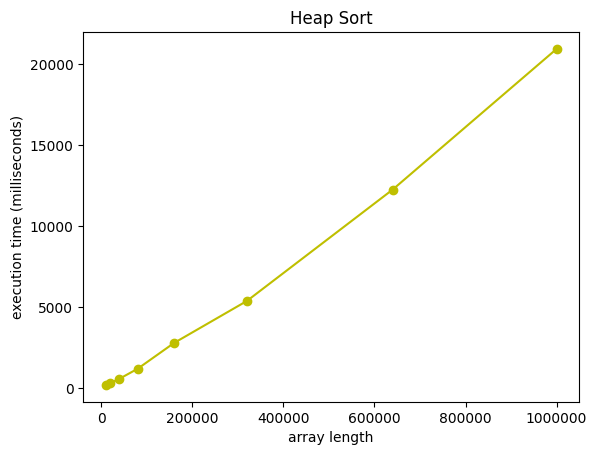

In [14]:
plt.plot(array_, ex_time_heap, '-oy')
plt.xlabel("array length")
plt.ylabel("execution time (milliseconds)")
plt.title("Heap Sort")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## 4. Insertion sort

In [23]:
def countingSort(arr):
    size = len(arr)
    output = [0] * size

    # count array initialization
    count = [0] * size

    # storing the count of each element
    for m in range(0, size):
        count[arr[m]] += 1

    # storing the cumulative count
    for m in range(1, 10):
        count[m] += count[m - 1]

    # place the elements in output array after finding the index of each element of original array in count array
    m = size - 1
    while m >= 0:
        output[count[arr[m]] - 1] = arr[m]
        count[arr[m]] -= 1
        m -= 1

    for m in range(0, size):
        arr[m] = output[m]


In [25]:
ex_time_c = []
for i in array_:
	start = time.time()
	array_c = values[:i].copy()
	countingSort(array_c)
	end = time.time()
	ex_time_c.append((end - start) * 1000)

table = pd.DataFrame(data=array_, columns=['array length'])
table['execution time (milliseconds)'] = ex_time_c
print(table)

   array length  execution time (milliseconds)
0         10000                      12.528419
1         20000                      24.437904
2         40000                      45.604944
3         80000                      75.562954
4        160000                     167.082787
5        320000                     445.294380
6        640000                     463.932276
7       1000000                     893.347740


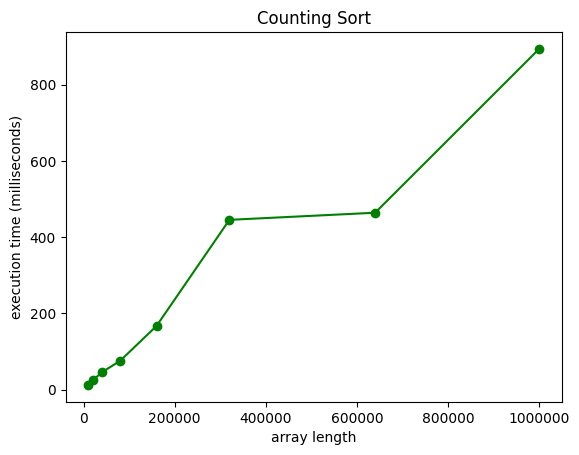

In [26]:
plt.plot(array_, ex_time_c, '-og')
plt.xlabel("array length")
plt.ylabel("execution time (milliseconds)")
plt.title("Counting Sort")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## Let's see them all

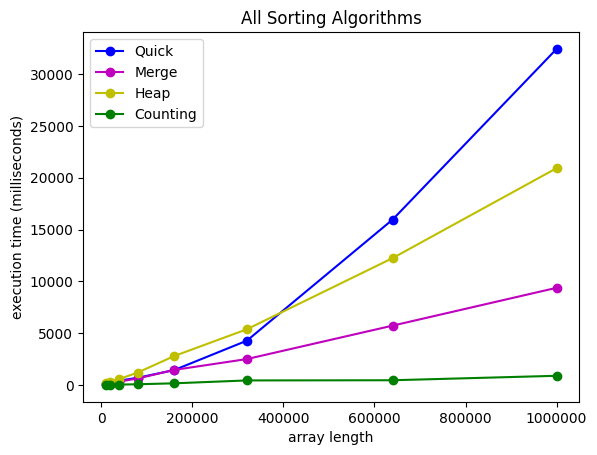

In [27]:
plt.plot(array_, ex_time_quick, '-ob', label="Quick")
plt.plot(array_, ex_time_merge, '-om', label="Merge")
plt.plot(array_, ex_time_heap, '-oy', label="Heap")
plt.plot(array_, ex_time_c, '-og', label="Counting")
plt.legend(['Quick', 'Merge', 'Heap', 'Counting'])
plt.xlabel("array length")
plt.ylabel("execution time (milliseconds)")
plt.title("All Sorting Algorithms")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

### Made with <3 by Cristina